In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# preliminaries
data_files = False
save_fig = False

# channel SNRs
SNR1dB = 20
SNR2dB = 0
SNR1 = 10.0**(SNR1dB/10.0)
SNR2 = 10.0**(SNR2dB/10.0)

# power split parameter
alpha = np.arange(0.001, 0.999, 0.001)

# time / bandwidth split parameter
tau_TD = np.array([0.001, 0.2, 0.4, 0.6, 0.8, 0.999])
tau_FD = np.arange(0.001, 0.999, 0.01)
#tau_FD = np.arange(0.01, 0.99, 0.01)


Tau, Alpha = np.meshgrid(tau_FD, alpha)

# ---------------------------------------------------------------------------------------------------------------------
# calculating results
# ---------------------------------------------------------------------------------------------------------------------

# channel capacities for individual channels
C1 = np.log2(1+SNR1)
C2 = np.log2(1+SNR2)

# capacities for TDMA (time sharing)
Corth1_TD = tau_TD * np.log2(1+SNR1)
Corth2_TD = (1-tau_TD) * np.log2(1+SNR2)

# capacities for FDMA (frequency sharing)
Corth1_FD = Tau  * np.log2( 1 + Alpha*SNR1/Tau )
Corth2_FD = (1-Tau) * np.log2( 1 + (1-Alpha)*SNR2/(1-Tau) )

# maximum sum rate for FDMA
# optimal power split alpha for given frequency split tau (analytic solution)
alpha_opt = (1.0/SNR2 - 1.0/SNR1) * tau_FD * (1-tau_FD) + tau_FD
# resulting optimal SNRs
gamma1_opt = alpha_opt / tau_FD * SNR1
gamma2_opt = (1-alpha_opt) / (1-tau_FD) * SNR2

# sum rates for optimized FDMA
sumRateFD1_opt = tau_FD * np.log2(1 + gamma1_opt)
sumRateFD2_opt = (1-tau_FD) * np.log2(1 + gamma2_opt)


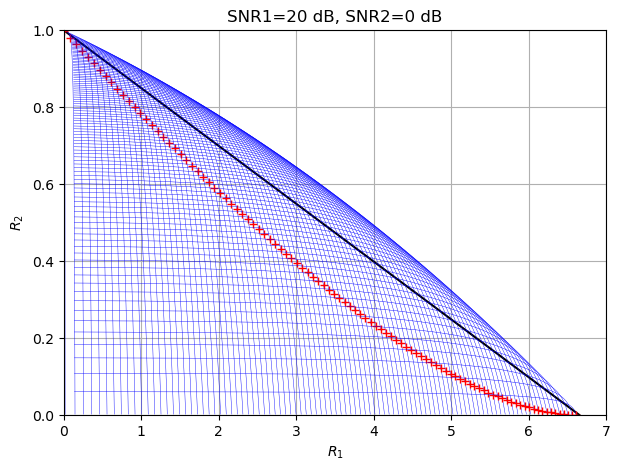

In [9]:
fig_BC = plt.figure(figsize=(7,5))
ax = fig_BC.add_subplot(111)
ax.plot(Corth1_TD,Corth2_TD,'k-',label='TD')
for run in range(0, tau_FD.size):
    ax.plot(Corth1_FD[:,run], Corth2_FD[:,run], 'b', linewidth=0.3, label='FD, tau=%.1f' %(tau_FD[run]))
    ax.plot(sumRateFD1_opt[run], sumRateFD2_opt[run], '+r')
plt.grid(True)
#plt.legend()
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))

if data_files:
    name = '../Results/part3_cr_bc_' + str(SNR1dB) + '_' + str(SNR2dB)
    np.savetxt(name + '_TD.rst', list(zip(Corth1_TD, Corth2_TD)), delimiter='\t')
    np.savetxt(name + '_FD.rst', list(zip(Corth1_FD[:,0], Corth2_FD[:,0], Corth1_FD[:,1], Corth2_FD[:,1], Corth1_FD[:,2], Corth2_FD[:,2], Corth1_FD[:,3], Corth2_FD[:,3])), delimiter='\t')
    np.savetxt(name + '_FDsr.rst', list(zip(sumRateFD1_opt, sumRateFD2_opt)), delimiter='\t')
    name = '../Results/part3_bc_' + str(SNR1dB) + '_' + str(SNR2dB)
    np.savetxt(name + '_FD_ellopt.rst', list(zip(tau_FD, ell_opt)), delimiter='\t')
if save_fig:
    name = '../Figures/part3_cr_bc_td_fd_' + str(SNR1dB) + '_' + str(SNR2dB) + '.pdf'
    fig_BC.savefig(name, bbox_inches='tight', dpi=300, format='pdf')

plt.show()


Text(0.5, 1.0, 'SNR1=20 dB, SNR2=0 dB')

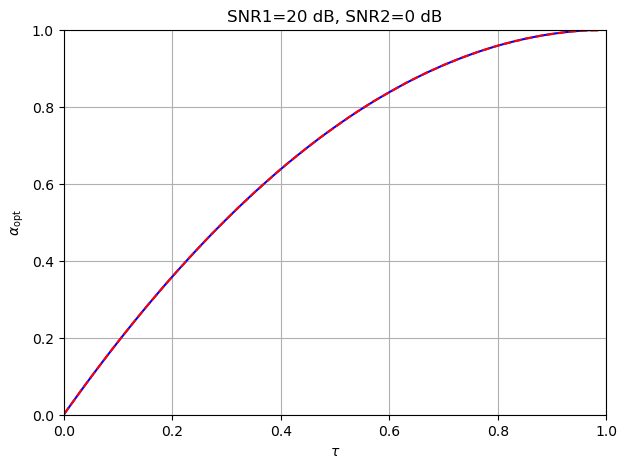

In [19]:
ptr_alpha_opt = np.argmax(Corth1_FD+Corth2_FD,axis=0)

fig_ell = plt.figure(figsize=(7,5))
ax = fig_ell.add_subplot(111)
ax.plot(tau_FD,alpha_opt,'b-',label='analytic')
ax.plot(tau_FD,alpha[ptr_alpha_opt],'r--',label='numeric')
plt.grid(True)
#plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('$\\tau$')
plt.ylabel('$\\alpha_{\\mathrm{opt}}$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))


#print(np.argmax(Corth1_FD[:,50]))
#print(Corth1_FD[:,50])